In [36]:
import numpy as np   

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

import pandas as pd    

import matplotlib.pyplot as plt   

import seaborn as sns

In [37]:
data=pd.read_csv(r"/Users/mehmetkorkmaz/Applications/venv/auto-mpg.csv")

In [38]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [39]:
data[data['horsepower'].str.isnumeric()==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [40]:
data=data.replace('?',np.nan)
data=data.drop('car name',axis=1)
data=data.apply(lambda x: x.fillna(x.median()),axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


/var/folders/wp/28y2ysl952qg01qy8dlhmh3c0000gn/T/ipykernel_7855/3781047936.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
/var/folders/wp/28y2ysl952qg01qy8dlhmh3c0000gn/T/ipykernel_7855/3781047936.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x[i])
/var/folders/wp/28y2ysl952qg01

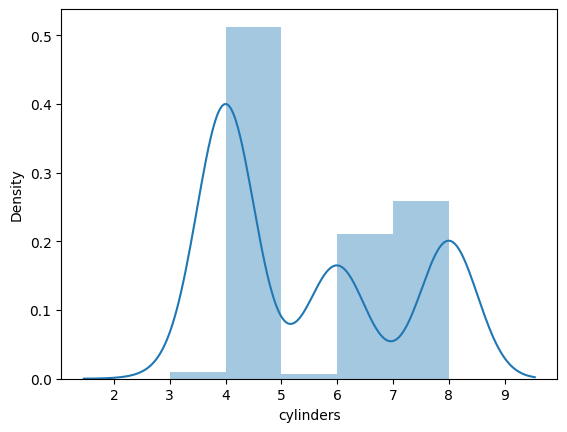

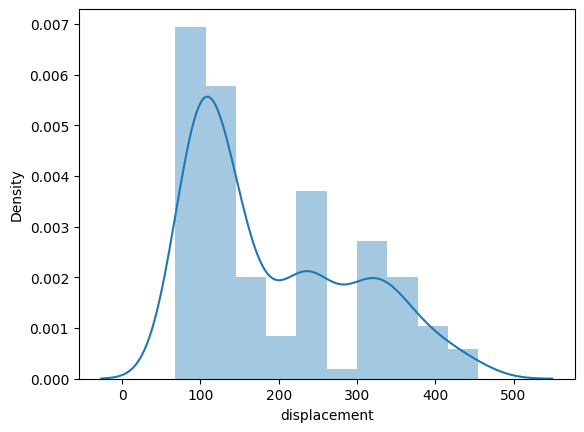

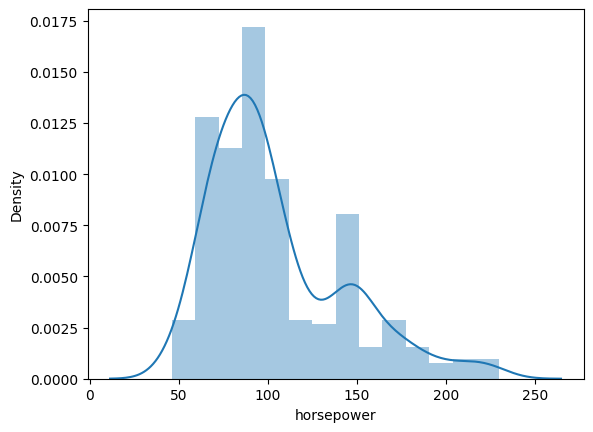

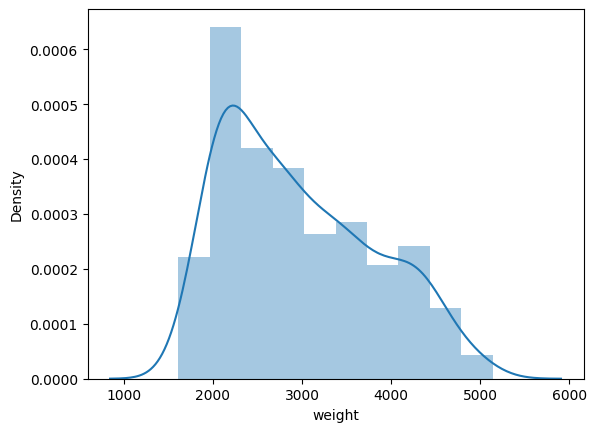

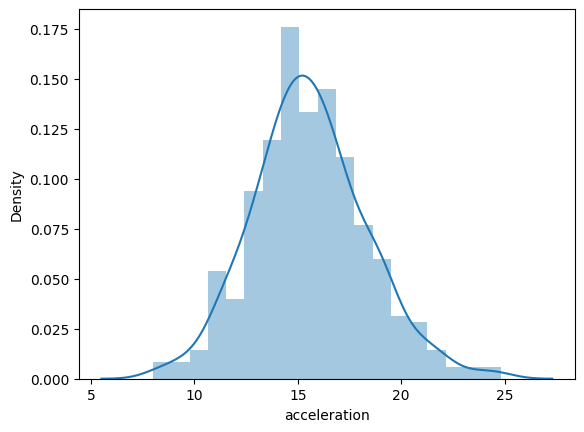

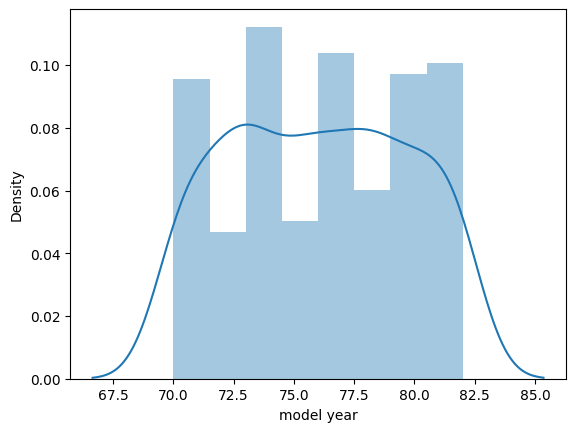

In [41]:
x = data.drop('mpg', axis=1)

#Copying the 'mpg' column alone into the y dataframe. This is the dependent variable
y = data[['mpg']]

a=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
for i in a:
    plt.figure()
    sns.distplot(x[i])

# Factor Analysis

In [42]:
from factor_analyzer.factor_analyzer import FactorAnalyzer

In [43]:
fa=FactorAnalyzer(rotation='varimax')
fa.fit(data)
eig_val, val =fa.get_eigenvalues()
sorted(eig_val)

[0.03192670879935707,
 0.05488070573759197,
 0.11731043481077752,
 0.18570637702820492,
 0.48610554646816573,
 0.817417781276708,
 0.9431058089244121,
 5.363546636954787]

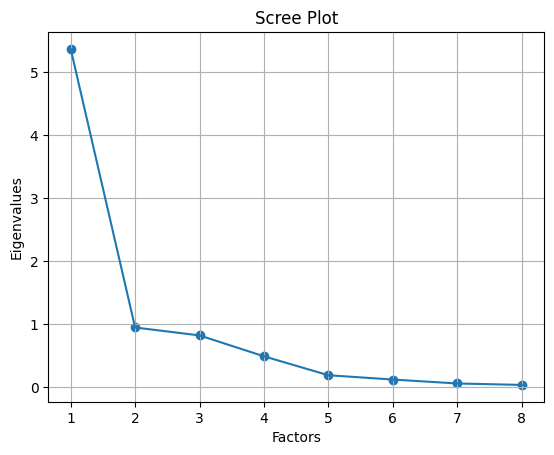

In [44]:
plt.scatter(range(1,data.shape[1]+1),eig_val)
plt.plot(range(1,data.shape[1]+1),eig_val)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

In [45]:
pd.DataFrame(fa.loadings_, columns=['F1','F2','F3'], index=[data.columns])
#grafikten 3 faktör yeterli gözüküyor


,F1,F2,F3
mpg,-0.666887,-0.207779,0.716132
cylinders,0.799393,0.437510,-0.227856
displacement,0.836966,0.477195,-0.232443
horsepower,0.590804,0.717068,-0.314280
weight,0.875230,0.333218,-0.227985
acceleration,-0.179164,-0.714520,0.203332
model year,-0.129146,-0.203591,0.625621
origin,-0.619753,-0.069101,0.164225


In [46]:
#factor 1 cylinders ,weight ve displacement için yüksek factor loadings sahip
#factor 2 horsepower
#factor 3 mpg, model year ve acceleration için yüksek loadings sahip

# Regression Models

In [25]:
from sklearn import preprocessing

# scale all the columns of the data. This will produce a numpy array
x_scaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=1)

# OLS

In [27]:
regression_model = LinearRegression()
regression_model.fit(xtrain, ytrain)

for idx, col_name in enumerate(xtrain.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.08561436895562656
The coefficient for displacement is 0.30441822535930174
The coefficient for horsepower is -0.09718466302484224
The coefficient for weight is -0.7628632829136761
The coefficient for acceleration is 0.0215912751729244
The coefficient for model year is 0.37494080741187125
The coefficient for origin is 0.12302637024556859


In [28]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.01283312829399291


# Ridge Regression

In [29]:
ridge = Ridge(alpha=.3)

ridge.fit(xtrain,ytrain)
for i,col in enumerate(xtrain.columns):   
    print ("Ridge model coefficients for {} is {}:".format(col,ridge.coef_[0][i]))

Ridge model coefficients for cylinders is -0.08073001909555892:
Ridge model coefficients for displacement is 0.28822207417231593:
Ridge model coefficients for horsepower is -0.09985675156606143:
Ridge model coefficients for weight is -0.7510550916024495:
Ridge model coefficients for acceleration is 0.01912769831483264:
Ridge model coefficients for model year is 0.3737831248958428:
Ridge model coefficients for origin is 0.12212717285800277:


# Lasso Regression

In [30]:
lasso = Lasso(alpha=0.1)
lasso.fit(xtrain,ytrain)
for i,col in enumerate(xtrain):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for cylinders is -0.0:
Lasso model coefficients for displacement is -0.0:
Lasso model coefficients for horsepower is -0.013280002937314536:
Lasso model coefficients for weight is -0.6205207866794482:
Lasso model coefficients for acceleration is 0.0:
Lasso model coefficients for model year is 0.29198732924913484:
Lasso model coefficients for origin is 0.021567653979880638:
